In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [4]:
#parameters
rs_ac, rds_ac, rs, rds, ro = 1450, 75, 11, 300, 1e4
rext = 12.6
lam, m = 0.11, 2
td1, td2 = 0.01, 0.03

#Definition of the model
alpha, beta, theta, phi, ep = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext
params = np.array([alpha, beta, theta, phi, ep])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0])
model = delayed_oscillation(delayed_full_first_order, delay=delay, params=params, consts=consts, init_cond=init_cond)

sol, t = model.simulate()

Generating, compiling, and loading C code.
Using default integration parameters.


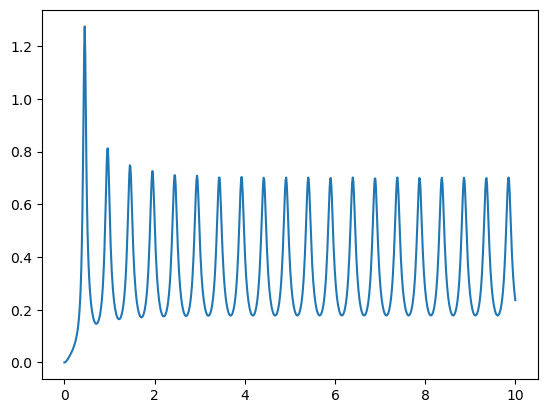

In [7]:
cS = sol[:, 1]
plt.plot(t, cS, label='cS')

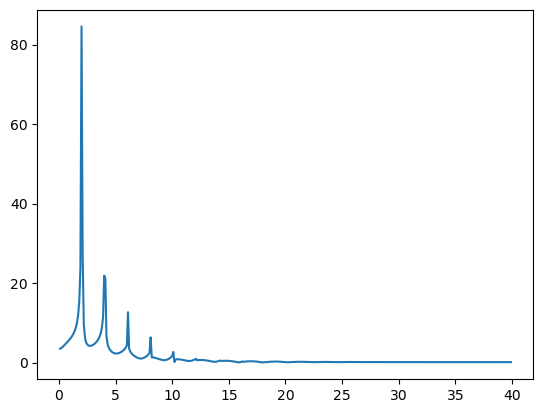

In [19]:
T = 10/len(t)
y=sp.fft.fft(cS)
x=sp.fft.fftfreq(len(t), T)[1:len(t)//2]
plt.plot(x, np.abs(y)[1:len(t)//2], label='FFT')

In [36]:
yabs = np.abs(y)[1:len(t)//2]
ym = yabs.max()
ymidx = np.where(yabs == ym)
x[ymidx]

array([2.])